<h2><font color = blue ><span style='font-family:Georgia'>Table of Contents:</span></font></h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Problem Statement</a></li>
        <li><a href='#libraries'>Python Initialization</a></li>
        <ol>
            <li><a href='#import'>Importing Libraries</a></li>
            <li><a href='#suppress'>Suppress Warnings</a></li>
            <li><a href='#display'>Adjust Display values</a></li>
        </ol>
        <li><a href='#data'>Data Understanding and Data Loading</a></li>
        <ol>
            <li><a href='#read'>Reading the dataset</a></li>
            <li><a href='#display'>Display first 5 rows of the dataset</a></li>
            <li><a href='#info'>Dataset dimensions and datatypes information</a></li>
        </ol>
        <li><a href='#preprocessing'>Pre-Processing</a></li>
        <ol>
            <li><a href='#missing'>Fix missing values and remove irrelevant columns</a></li>
            <li><a href='#map'>Map values of Categorical columns from data dictionary</a></li>
        </ol>
        <li><a href='#eda'>EDA</a></li>
        <ol>
            <li><a href='#numerical'>Numerical Variables</a></li>
            <li><a href='#categorical'>Categorical Variables</a></li>
            <li><a href='#correlation'>Correlation Matrix</a></li>
        </ol>
        <li><a href='#prepare'>Data Preparation</a></li>
        <ol>
            <li><a href='#dummy'>Create dummy variables for non-binary categorical variables</a></li>
        </ol>
        <li><a href='#model'>Model Building</a></li>
        <ol>
            <li><a href='#split'>Train-Test-Split</a></li>
            <li><a href='#rescaling'>Rescaling the numerical variables</a></li>
            <li><a href='#divide'>Divide data into X and y</a></li>
            <li><a href='#build'>Build linear regression model</a></li>
            <li><a href='#feature'>Iterative Feature Selection</li>
        </ol>
        <li><a href='#evaluation'>Model Evaluation</a></li>
        <ol>
            <li><a href='#residualt'>Residual analysis of training set</a></li>
            <li><a href='#prediction'>Making Predictions using final model</a></li>
            <li><a href='#final'>Final Model Evaluation</a></li>
        </ol>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<a id="intro"></a>
<h2 ><font color = blue ><span style='font-family:Georgia'>1. Problem Statement:</span></font></h2>
<h3><font color = purple ><span style='font-family:Georgia'>Introduction:</span></font></h3>
<p>
    <span style='font-family:Georgia'>
    This assignment aims to give an idea about how to build a multiple linear regression model. Specifically, we have to build a multiple linear regression model for the prediction of demand for shared bikes.
    </span>
</p>   
<hr>
<h3><font color = purple ><span style='font-family:Georgia'>Business Understanding:</span></font></h3>
<p>
    <span style='font-family:Georgia'>
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. <br><br>
    A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br>
    </span>
</p>
    
<p>
    <span style='font-family:Georgia'>
    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. <br><br>
    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: </span></p>

<ul>
    <span style='font-family:Georgia'>
        <li>Which variables are significant in predicting the demand for shared bikes.</li>
        <li>How well those variables describe the bike demands</li>
    </span>
</ul>
<hr>
<h3><font color = purple ><span style='font-family:Georgia'>Business Goal:</span></font></h3>
<p>
    <span style='font-family:Georgia'>
        We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
    </span>
</p>

<a id="libraries"></a>
<h2><font color = blue ><span style='font-family:Georgia'>2. Python Initialization:</span></font></h2>

<a id="import"></a>
<h3><font color = purple ><span style='font-family:Georgia'>2.1 Importing Libraries:</span></font></h3>

In [617]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib as mp
import plotly as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Building
import sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import r2_score,mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE

import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

print('NumPy Version : ', np.__version__)
print('Pandas Version : ', pd.__version__)
print('Matplotlib Version : ', mp.__version__)
print('Seaborn Version : ', sns.__version__)


NumPy Version :  1.26.4
Pandas Version :  2.1.4
Matplotlib Version :  3.8.0
Seaborn Version :  0.13.2


<a id="suppress"></a>
<h3><font color = purple ><span style='font-family:Georgia'>2.2 Suppress Warnings:</span></font></h3>

In [619]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

<a id="display"></a>
<h3><font color = purple ><span style='font-family:Georgia'>2.3 Adjust Display values:</span></font></h3>

In [621]:
# Adjusting Jupyter Display values for maximum rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 500)
pd.set_option('display.width', None)

<a id="data"></a>
<h2><font color = blue ><span style='font-family:Georgia'>3. Data Understanding and Data Loading:</span></font></h2>

<a id="read"></a>
<h3><font color = purple ><span style='font-family:Georgia'>3.1 Reading the dataset:</span></font></h3>

In [624]:
# Loading the csv file into loanDF dataframe using pandas read_csv function
bikeDF = pd.read_csv("day.csv")

<a id="display"></a>
<h3><font color = purple ><span style='font-family:Georgia'>3.2 Display first 5 rows of the dataset:</span></font></h3>

In [626]:
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<a id="info"></a>
<h3><font color = purple ><span style='font-family:Georgia'>3.3 Dataset dimensions and datatypes information:</span></font></h3>

In [628]:
# Displaying shape of the bike dataframe
print(bikeDF.shape)

(730, 16)


In [629]:
# Displaying information of the bike dataframe
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [630]:
# Describing the dataframe
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>The dataset has 730 rows and 16 columns. All columns are numerical except one column- dteday. There seems to be some fields which are categorical like weathersit, workingday. 
    </span>    
</div>

<a id="preprocessing"></a>
<h2><font color = blue ><span style='font-family:Georgia'>4. Pre-Processing:</span></font></h2>

<a id="missing"></a>
<h3><font color = purple ><span style='font-family:Georgia'>4.1 Fix missing values and remove irrelevant columns:</span></font></h3>

In [634]:
# Check for percentage of missing values in all columns
round(100*(bikeDF.isnull().sum()/len(bikeDF)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [635]:
# Check for duplicates
bike_dup = bikeDF.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [636]:
# Find the unique values in all columns
print(bikeDF.nunique().sort_values(ascending=True))

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>There are no missing values in the dataset and no duplicate rows. There are 7 categorical columns namely- yr, holiday, workingday, weathersit, season, weekday and mnth. We need to map the values as per the data dictionary provided and create dummy variables for some of these.   
    </span>    
</div>

### Remove irrelevant columns

Looking from the data and data dictionary, following columns can be removed
1. instant: This is an index column and is not needed for our analysis
2. dteday: We already have the month, year and weekday, so this variable is redundant
3. casual and registered: As per Problem statement, cnt is the target variable and consists of both casual and registered users. So, we can remove these columns

In [639]:
dropcols = ['instant','dteday','casual','registered']
bikeDF.drop(dropcols,axis=1,inplace=True)

#Inspect the shape of the dataframe
bikeDF.shape

(730, 12)

In [640]:
# renaming few columns for better readibility

bikeDF.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<a id="map"></a>
<h3><font color = purple ><span style='font-family:Georgia'>4.2 Map values of Categorical columns from data dictionary:</span></font></h3>

In [642]:
# Encoding/mapping the season column

bikeDF.season = bikeDF.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [643]:
# Encoding/mapping the month column

bikeDF.month = bikeDF.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [644]:
# Encoding/mapping the weekday column

bikeDF.weekday = bikeDF.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [645]:
# Encoding/mapping the weathersit column

bikeDF.weathersit = bikeDF.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [646]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [647]:
bikeDF.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [648]:
# Convert to 'category' data type

#bikeDF['season']=bikeDF['season'].astype('category')
#bikeDF['weathersit']=bikeDF['weathersit'].astype('category')
#bikeDF['mnth']=bikeDF['mnth'].astype('category')
#bikeDF['weekday']=bikeDF['weekday'].astype('category')

In [649]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<a id="eda"></a>
<h2><font color = blue ><span style='font-family:Georgia'>5. EDA:</span></font></h2>

As we know, EDA is a very important step as it helps us in understanding the data

- If there is some obvious multicollinearity going on, this is the first place to catch it- 
Here's whereweu'll also identify if some predictors directly have a strong association with the outcome variable

<a id="numerical"></a>
<h3><font color = purple ><span style='font-family:Georgia'>5.1 Visualizing Numerical Variables:</span></font></h3>

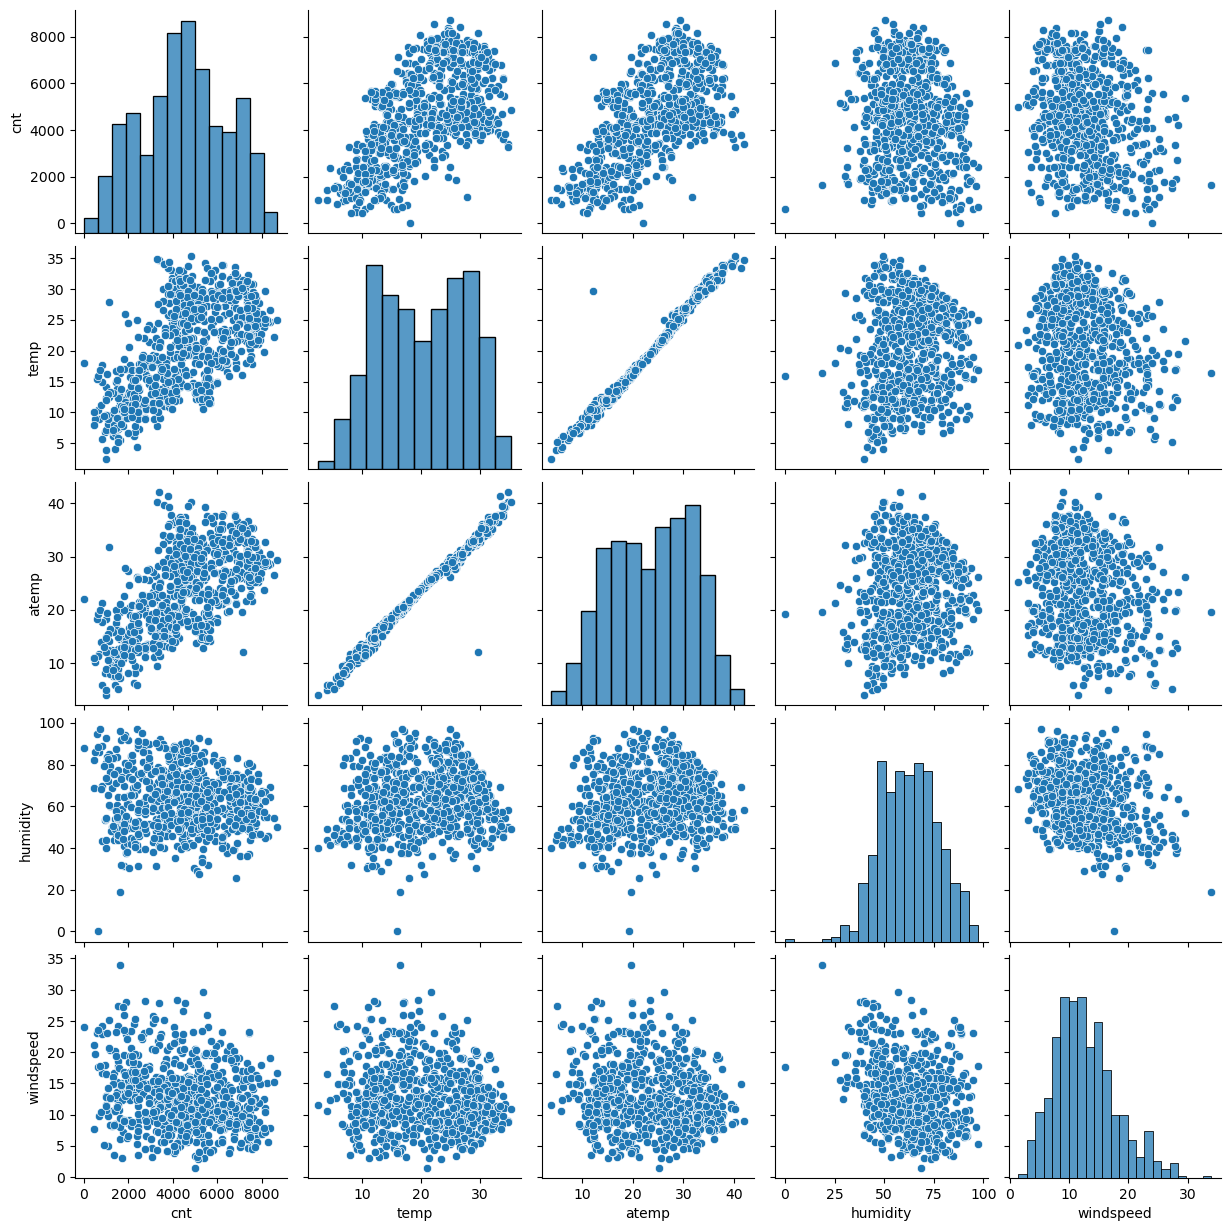

In [653]:
# Making a pairplot of all numerical variables
num_cols=['cnt','temp','atemp','humidity','windspeed']
sns.pairplot(bikeDF[num_cols])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>There seems to be some positive correlation between temp vs. cnt and atemp vs. cnt. Also, there seems to be high positive correlation between temp and atemp. It would be wise to keep only one of these, but we will verify it at the time of feature selection   
    </span>    
</div>

<a id="categorical"></a>
<h3><font color = purple ><span style='font-family:Georgia'>5.2 Visualizing Categorical Variables:</span></font></h3>

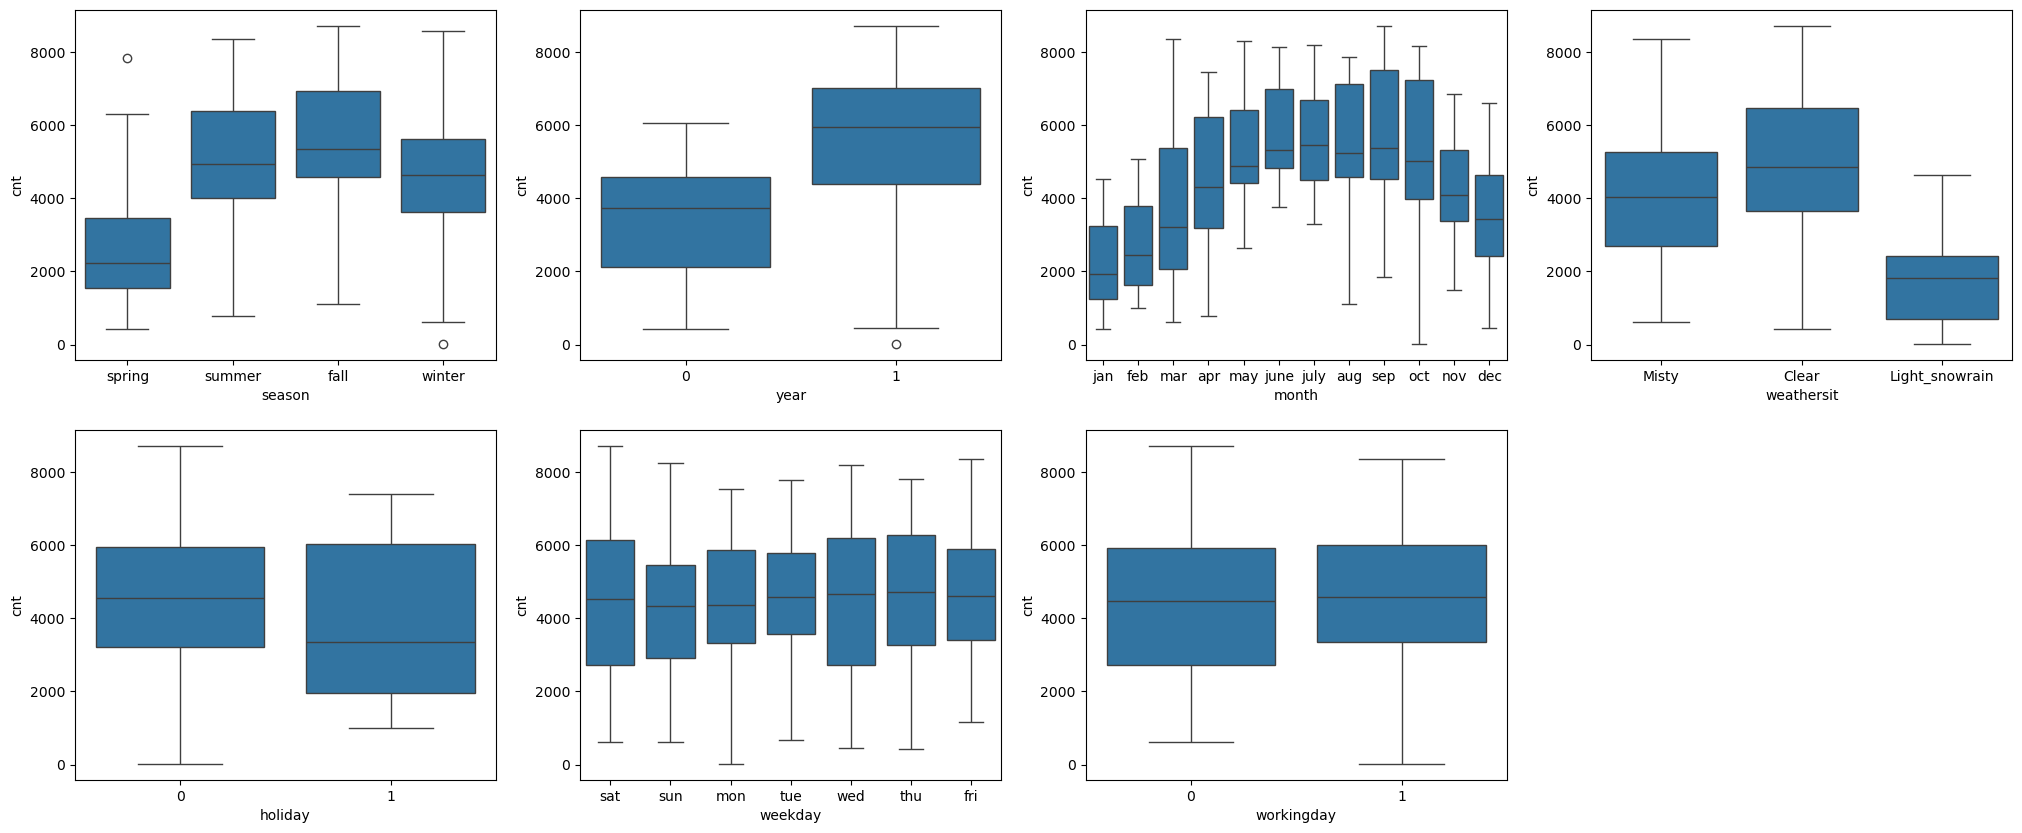

In [656]:
# Making a boxplot of all categorical variables againt the target variable 'cnt' 

plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeDF)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = bikeDF)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = bikeDF)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeDF)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeDF)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeDF)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeDF)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There seems to be high demand for bike in fall season</li>
            <li>The bike demand seems to be increasing per year with May to October month having particularly high demand</li>
            <li>Bike rental demand increases when the weather is clear</li>
            <li>Median Bike rentals decrease when there is a holiday implying customers are using rental bike for office commute</li>
            <li>Median Bike rentals seems to be same for working and non-working days</li>
        </ul>   
    </span>    
</div>

<a id="correlation"></a>
<h3><font color = purple ><span style='font-family:Georgia'>5.3 Correlation Matrix:</span></font></h3>

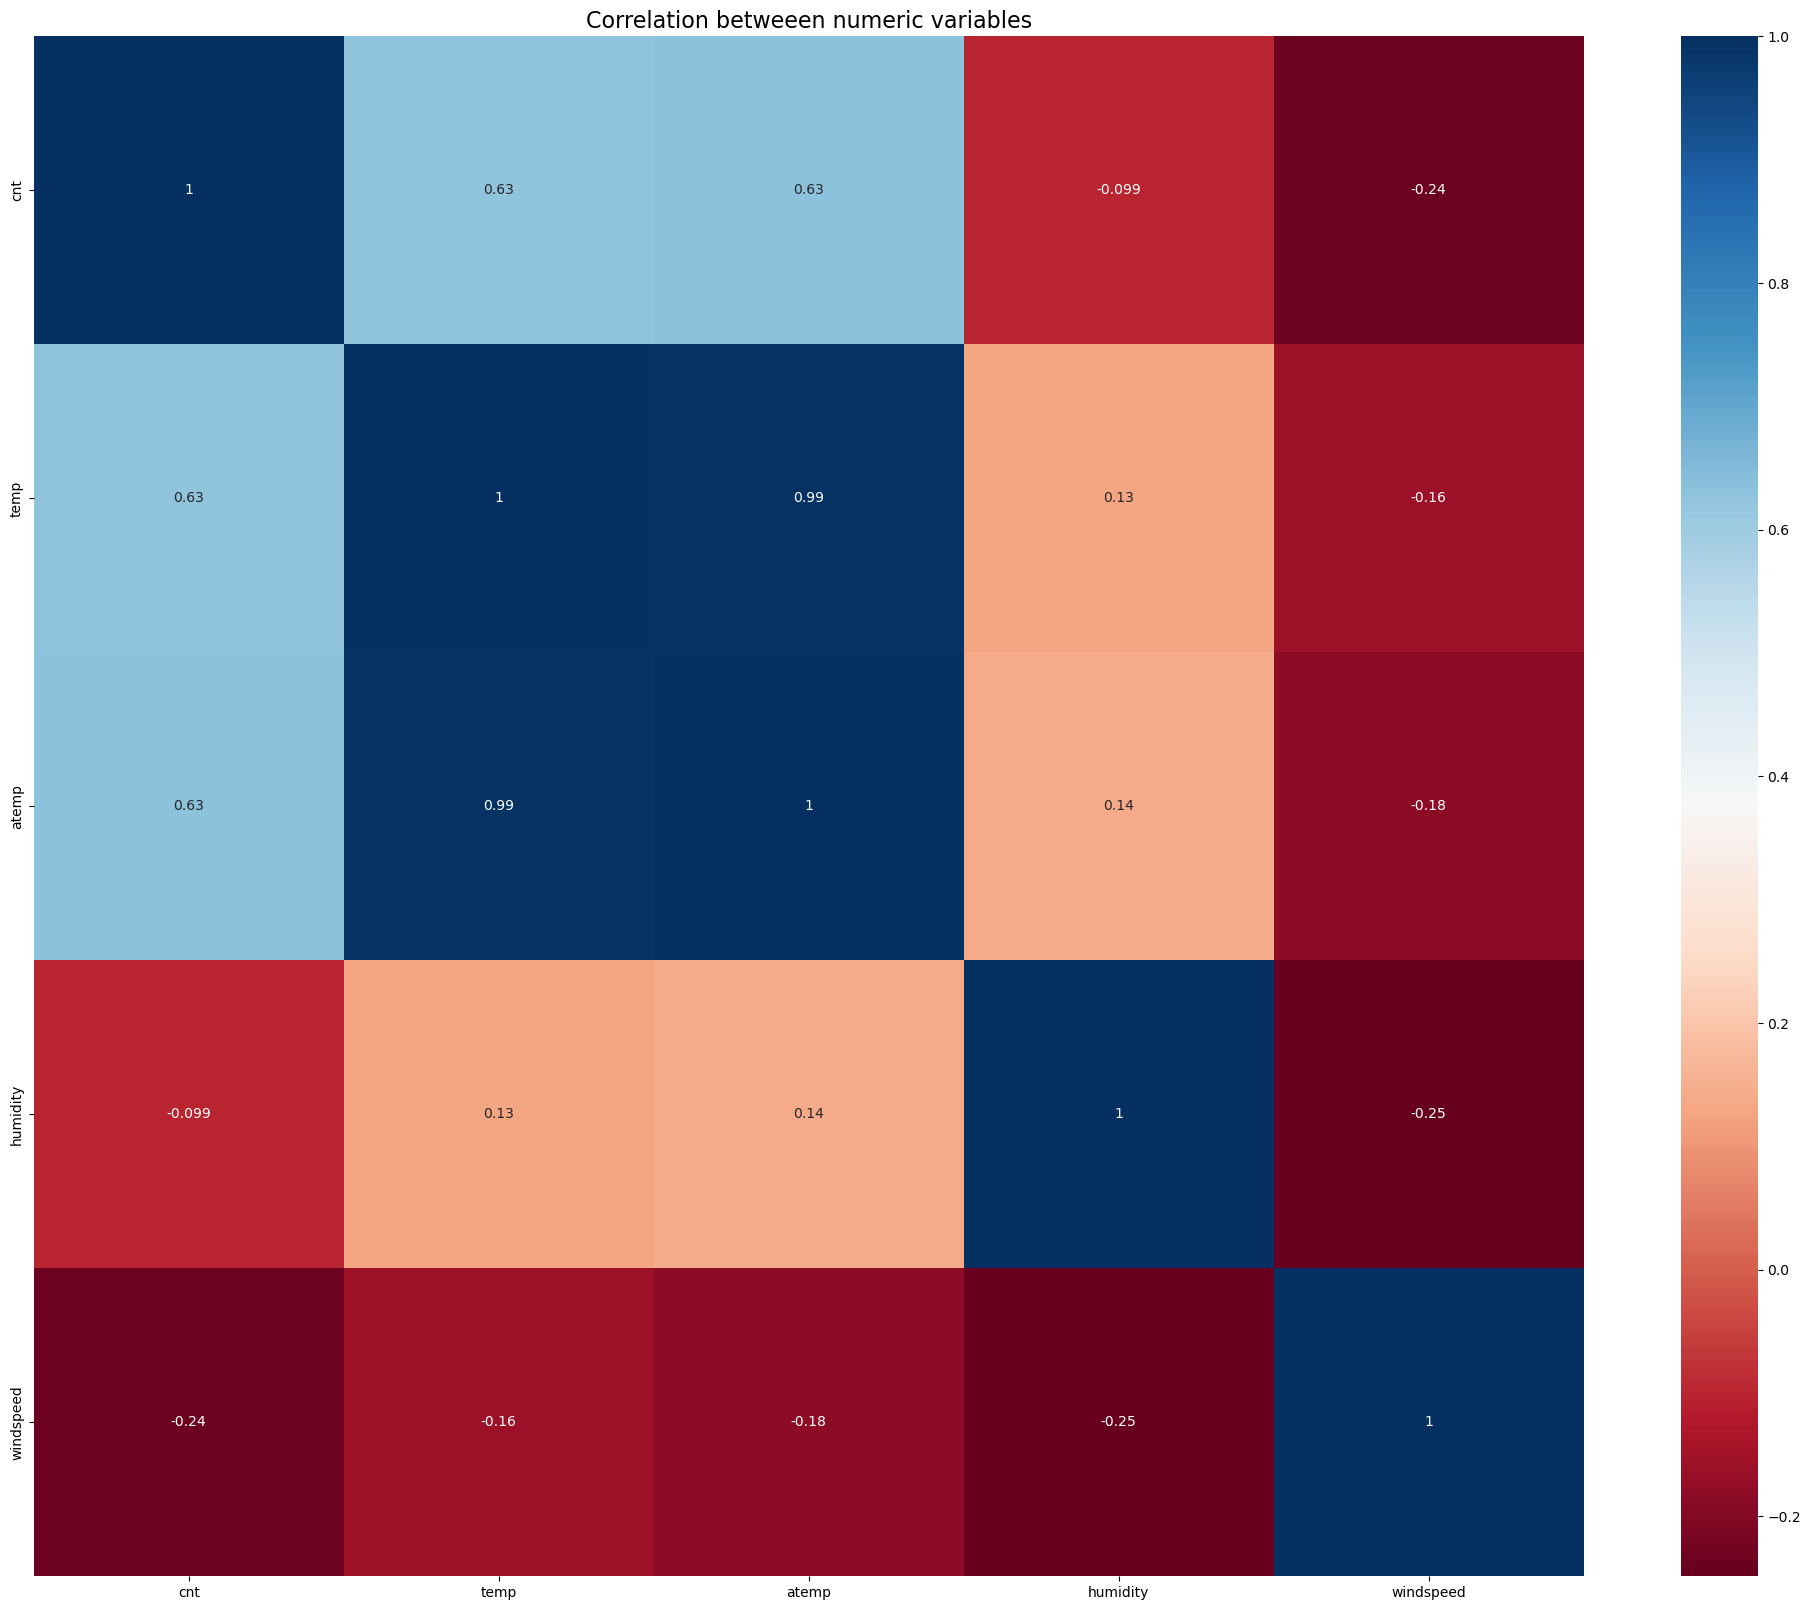

In [659]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
plt.title("Correlation betweeen numeric variables",fontsize=16)
sns.heatmap(bikeDF[num_cols].corr(), annot = True, cmap="RdBu")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There seems to be high correlation (0.63) between cnt, temp and atemp</li>
            <li>There is extremely high correlation (0.99) between temp and atemp and we should be removing one of them. But, we would check the multicollinearity using VIF to decide on this</li>
            <li>There is a slight negative correlation (-0.24) between cnt and windspeed which is not surprising as it will be difficult to ride bike in high windy conditions</li>
        </ul>   
    </span>    
</div>

<a id="prepare"></a>
<h2><font color = blue ><span style='font-family:Georgia'>6. Data Preparation:</span></font></h2>

<a id="dummy"></a>
<h3><font color = purple ><span style='font-family:Georgia'>6.1 Create dummy variables for non-binary categorical variables:</span></font></h3>

In [663]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = bikeDF.copy()
#bike_new = pd.get_dummies(bikeDF, drop_first = True)
bike_new = pd.get_dummies(bikeDF, drop_first = True, dtype=int)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    int32  
 9   season_summer              730 non-null    int32  
 10  season_winter              730 non-null    int32  
 11  month_aug                  730 non-null    int32  
 12  month_dec                  730 non-null    int32  
 13  month_feb                  730 non-null    int32  

In [664]:
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<a id="model"></a>
<h2><font color = blue ><span style='font-family:Georgia'>7. Model Building:</span></font></h2>

<a id="split"></a>
<h3><font color = purple ><span style='font-family:Georgia'>7.1 Train-Test-Split:</span></font></h3>

In [667]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [668]:
# Verifying the resulting train and test dataframes after split
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   humidity                   510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   season_spring              510 non-null    int32  
 9   season_summer              510 non-null    int32  
 10  season_winter              510 non-null    int32  
 11  month_aug                  510 non-null    int32  
 12  month_dec                  510 non-null    int32  
 13  month_feb                  510 non-null    int32  
 14

In [669]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   humidity                   219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   cnt                        219 non-null    int64  
 8   season_spring              219 non-null    int32  
 9   season_summer              219 non-null    int32  
 10  season_winter              219 non-null    int32  
 11  month_aug                  219 non-null    int32  
 12  month_dec                  219 non-null    int32  
 13  month_feb                  219 non-null    int32  
 14

<a id="rescaling"></a>
<h3><font color = purple ><span style='font-family:Georgia'>7.2 Rescaling the numerical variables:</span></font></h3>

In [671]:
from sklearn.preprocessing import MinMaxScaler

In [672]:
# We are going to use MinMaxScaler aka Normalization, i.e. Normalised values between 0 and 1
scaler = MinMaxScaler()

In [673]:
# Checking the data before scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [674]:
# We will apply scaler to all the numerical columns- temp, atemp, hum, windspeed and cnt
num_vars=['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [675]:
# Checking the data after scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [676]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="divide"></a>
<h3><font color = purple ><span style='font-family:Georgia'>7.3 Divide data into X and y:</span></font></h3>

In [678]:
y_train = df_train.pop('cnt')
X_train = df_train

<a id="build"></a>
<h3><font color = purple ><span style='font-family:Georgia'>7.4 Build linear regression model:</span></font></h3>

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [681]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [682]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
# running RFE
rfe = rfe.fit(X_train, y_train)

In [683]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 13),
 ('month_dec', False, 3),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 12),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', False, 4),
 ('month_oct', False, 14),
 ('month_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [684]:
# Features included after RFE
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [685]:
# Features not included after RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

<a id="feature"></a>
<h3><font color = purple ><span style='font-family:Georgia'>7.5 Iterative Feature Selection:</span></font></h3>

In [687]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [688]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [689]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,humidity,1.91
14,weathersit_Misty,1.57


### Building first model using statsmodel, for the detailed statistics

In [691]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

In [692]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [693]:
# Check the parameters obtained

lm1.params

const                        0.198900
year                         0.229738
holiday                     -0.018955
workingday                   0.083695
temp                         0.527819
humidity                    -0.159467
windspeed                   -0.180601
season_spring               -0.055434
season_summer                0.052613
season_winter                0.100294
month_july                  -0.054881
month_sep                    0.081773
weekday_sat                  0.093682
weekday_sun                  0.040479
weathersit_Light_snowrain   -0.246332
weathersit_Misty            -0.057847
dtype: float64

In [694]:
# Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        01:15:18   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There are no features with high VIF and high p-value</li>
            <li>workingday has high VIF, but p-value is 0</li>
            <li>holiday has low VIF, but high p-value</li>
            <li>From intuition, we can say that there might be high correlation between workingday, holiday and also weekday_sat, weekday_sun. So, we can remove holiday and build the model again</li>
        </ul>   
    </span>    
</div>

In [696]:
# Dropping holiday column as per above inference
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_sat,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.71
6,season_summer,3.03
13,weathersit_Misty,2.31


### Building second model

In [698]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        01:15:18   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There are no features with high VIF and high p-value</li>
            <li>Humidity has high VIF, but p-value is 0. So, we will remove it in this iteration</li>
        </ul>   
    </span>    
</div>

In [700]:
# Dropping humidity column as per above inference
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,year,2.07
7,month_july,1.60


### Building third model

In [702]:
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.73e-189
Time:                        01:15:18   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There are no features with high VIF and high p-value</li>
            <li>weekday_sun has moderate VIF and p-value. From intuition, it may have a collinarity with workingday, which may be the reason for high VIF for workingday. We will remove it in this iteration</li>
        </ul>   
    </span>    
</div>

In [704]:
# Dropping weekday_sun column as per above inference
X_train_new = X_train_new.drop(['weekday_sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,year,2.07
6,season_winter,1.92
9,weekday_sat,1.83
7,month_july,1.58
11,weathersit_Misty,1.56


### Building fourth model

In [706]:
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.28e-189
Time:                        01:15:18   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>There are no features with high VIF & high p-value or high p-value & low VIF</li>
            <li>temp is having high VIF, but low p-value. There may be a correlation between temp and windspeed. But, from our visualization, we know that there is a high correlation between temp and the target variable. So, we will go along with this model</li>
            <li>The above model has low multicollinearity between features and low p-values. The low Prob (F-statistic) of 3.28e-189 which is almost 0 states that the overall model is significant</li>
        </ul>   
    </span>    
</div>

In [708]:
# Checking the parameters and their coefficient values
lm4.params

const                        0.149280
year                         0.233807
workingday                   0.054735
temp                         0.492470
windspeed                   -0.149998
season_spring               -0.066220
season_summer                0.046893
season_winter                0.085092
month_july                  -0.048914
month_sep                    0.073841
weekday_sat                  0.066577
weathersit_Light_snowrain   -0.289240
weathersit_Misty            -0.082998
dtype: float64

<a id="evaluation"></a>
<h2><font color = blue ><span style='font-family:Georgia'>8. Model Evaluation:</span></font></h2>

<a id="residualt"></a>
<h3><font color = purple ><span style='font-family:Georgia'>8.1 Residual analysis of training set:</span></font></h3>

In [711]:
X_train_lm4.head()

,const,year,workingday,temp,windspeed,season_spring,season_summer,season_winter,month_july,month_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty
653,1.0,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1,0,1


In [712]:
# Predicting the values of target variable using training set
y_train_pred = lm4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

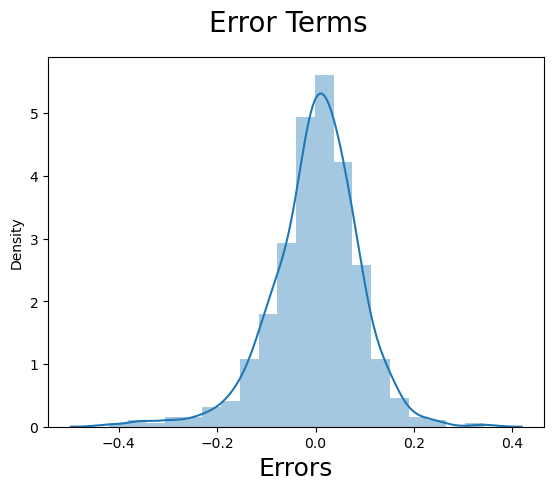

In [713]:
# Plot the histogram to validate whether the error terms are normally distributed as per the assumptions of the linear regression model
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inference: </b><br>
        <ul>
            <li>As we can see from above, error terms are normally distributed</li>
        </ul>   
    </span>    
</div>

<a id="prediction"></a>
<h3><font color = purple ><span style='font-family:Georgia'>8.2 Making Predictions using final model:</span></font></h3>

In [716]:
# Applying scaling on the test dataset
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [717]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide into X_test and y_test

In [719]:
y_test = df_test.pop('cnt')
X_test = df_test

In [720]:
# Creating X_test_new dataframe by including columns that were included in final training dataframe X_train_new
col1 = X_train_new.columns
X_test_new = X_test[col1]
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       219 non-null    int64  
 1   workingday                 219 non-null    int64  
 2   temp                       219 non-null    float64
 3   windspeed                  219 non-null    float64
 4   season_spring              219 non-null    int32  
 5   season_summer              219 non-null    int32  
 6   season_winter              219 non-null    int32  
 7   month_july                 219 non-null    int32  
 8   month_sep                  219 non-null    int32  
 9   weekday_sat                219 non-null    int32  
 10  weathersit_Light_snowrain  219 non-null    int32  
 11  weathersit_Misty           219 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 15.4 KB


In [721]:
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test_new)

In [722]:
# Predicting the target variable in test set using the final limear regression model lm4
y_pred_lm4 = lm4.predict(X_test_lm4)

<a id="final"></a>
<h3><font color = purple ><span style='font-family:Georgia'>8.3 Final Model Evaluation:</span></font></h3>

In [724]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lm4)
round(r2,3)

0.798

Text(0, 0.5, 'y_pred')

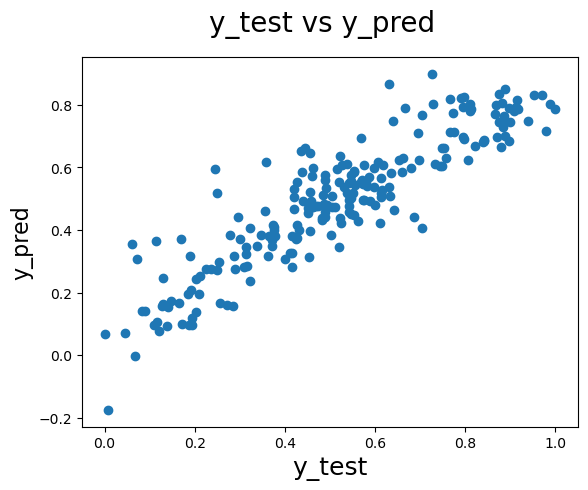

In [725]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [726]:
round(lm4.params,4)

const                        0.1493
year                         0.2338
workingday                   0.0547
temp                         0.4925
windspeed                   -0.1500
season_spring               -0.0662
season_summer                0.0469
season_winter                0.0851
month_july                  -0.0489
month_sep                    0.0738
weekday_sat                  0.0666
weathersit_Light_snowrain   -0.2892
weathersit_Misty            -0.0830
dtype: float64

Equation of our best fitted line is:

$ cnt = 0.1493 + 0.2338  \times  year + 0.0547 \times workingday + 0.4925 \times temp - 0.1500 \times windspeed - 0.0662 \times season_spring + 0.0469 \times season_summer + 0.0851 \times season_winter - 0.0489 \times month_july + 0.0738 \times month_sep + 0.0666 \times weekday_sat - 0.2892 \times weathersit_Light_snowrain - 0.0830 \times weathersit_Misty $

In [728]:
# Calculating Adjusted-R^2 value for the test dataset
# adjusted_r2 = 1 - ((1-r2)(N-1)/(N-p-1))

adjusted_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),3)
print(adjusted_r2)

0.786


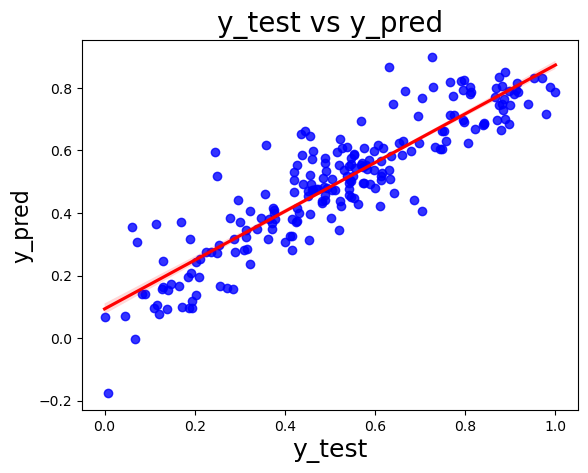

In [729]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred_lm4, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

<a id="conclusion"></a>
<h2><font color = blue ><span style='font-family:Georgia'>9. Conclusions:</span></font></h2>

# Comparision between Training and Test set:
    - Train dataset R^2          : 0.840
    - Test dataset R^2           : 0.798
    - Train dataset Adjusted R^2 : 0.837    
    - Test dataset Adjusted R^2  : 0.786

#### Demand of bikes depend on Year, Workingday, Temperature, Wind speed, Seasons- Spring, Summer, Winter, Months- July & September, Weekday- saturday, Weather -Light_snowrain, Misty.